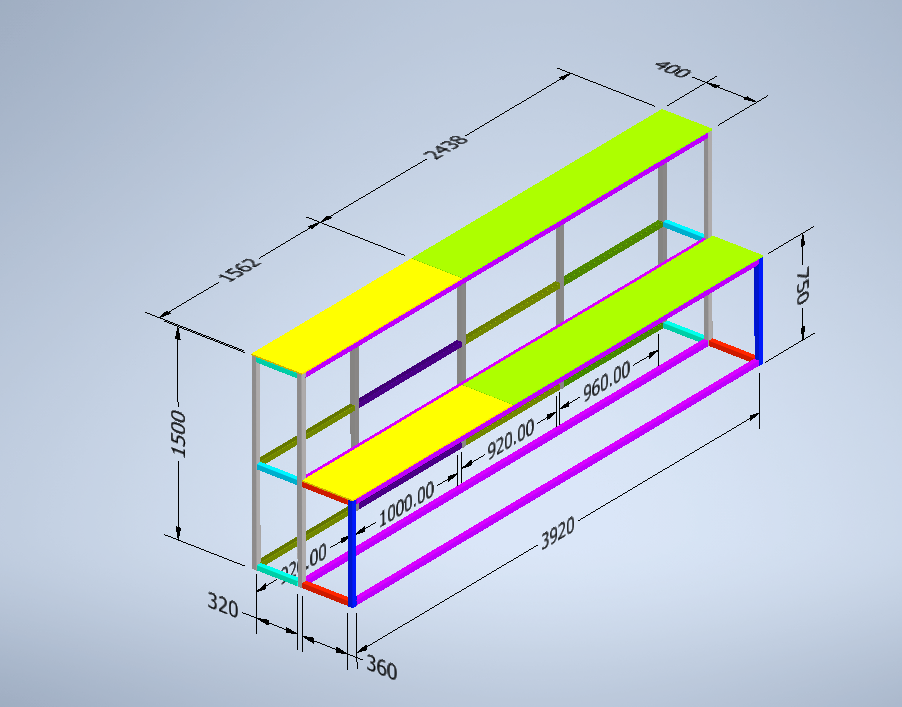

---



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
pip install pulp

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.3/14.3 MB 78.9 MB/s eta 0:00:00


In [ ]:
from pulp import *
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math


In [ ]:
data = pd.read_excel('/content/drive/MyDrive/Data sci AI Resecrh/Standing Cutting Optimize.xlsx')
data

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24
0,NaN,NaN,NaN,เหล็กกล่อง T2.5 X 40 X 40 X6000,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,Work1,Work2,Work3,Work4,Work5,Work6,...,NaN,NaN,8.0,4.0,2.0,4.0,6.0,NaN,NaN,NaN
2,NaN,NaN,NaN,Length part (+5),3925,1505,1005,965,925,755,...,NaN,NaN,32.0,16.0,8.0,16.0,24.0,NaN,NaN,NaN
3,NaN,NaN,NaN,QTY,80,40,10,10,20,20,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,Length part,3920,1500,1000,960,920,750,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102,NaN,NaN,NaN,97,0,1,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
103,NaN,NaN,NaN,98,0,1,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
104,NaN,NaN,NaN,99,0,1,0,0,0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
105,NaN,NaN,NaN,100,0,1,0,0,0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
data = pd.read_excel('/content/drive/MyDrive/Data sci AI Resecrh/Standing Cutting Optimize.xlsx' , sheet_name ='เหล็กกล่อง T2.5 X 40 X 40 X6000' ,header =2 , usecols= 'd:o'  )
data

,Unnamed: 3,Work1,Work2,Work3,Work4,Work5,Work6,Work7,Work8,Unnamed: 12,Unnamed: 13,Cost
0,Length part (+5),3925,1505.0,1005.0,965.0,925.0,755.0,365.0,325.0,Length STD.,6000,0
1,QTY,80,40.0,10.0,10.0,20.0,20.0,40.0,60.0,Length MIN,Lose Total,Steel Toal
2,Length part,3920,1500.0,1000.0,960.0,920.0,750.0,360.0,320.0,325,0,0
3,Pattern,Number of Pieces,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Length USE,Lose,Steel
4,1,1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,5795,205,0
...,...,...,...,...,...,...,...,...,...,...,...,...
100,97,0,1.0,0.0,0.0,0.0,0.0,0.0,13.0,5730,270,0
101,98,0,1.0,0.0,0.0,0.0,0.0,1.0,12.0,5770,230,0
102,99,0,1.0,0.0,0.0,0.0,1.0,0.0,11.0,5835,165,0
103,100,0,1.0,0.0,0.0,0.0,1.0,1.0,10.0,5875,125,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 3   105 non-null    object 
 1   Work1        105 non-null    object 
 2   Work2        104 non-null    float64
 3   Work3        104 non-null    float64
 4   Work4        104 non-null    float64
 5   Work5        104 non-null    float64
 6   Work6        104 non-null    float64
 7   Work7        104 non-null    float64
 8   Work8        104 non-null    float64
 9   Unnamed: 12  104 non-null    object 
 10  Unnamed: 13  104 non-null    object 
 11  Cost         104 non-null    object 
dtypes: float64(7), object(5)
memory usage: 10.0+ KB


In [ ]:
data.dtypes

Unnamed: 3      object
Work1           object
Work2          float64
Work3          float64
Work4          float64
Work5          float64
Work6          float64
Work7          float64
Work8          float64
Unnamed: 12     object
Unnamed: 13     object
Cost            object
dtype: object

In [ ]:
print('(row:column) =', data.shape)
print('name column' ,data.columns)

(row:column) = (105, 12)
name column Index(['Unnamed: 3', 'Work1', 'Work2', 'Work3', 'Work4', 'Work5', 'Work6',
       'Work7', 'Work8', 'Unnamed: 12', 'Unnamed: 13', 'Cost'],
      dtype='object')


In [ ]:
data

,Unnamed: 3,Work1,Work2,Work3,Work4,Work5,Work6,Work7,Work8,Unnamed: 12,Unnamed: 13,Cost
0,Length part (+5),3925,1505.0,1005.0,965.0,925.0,755.0,365.0,325.0,Length STD.,6000,0
1,QTY,80,40.0,10.0,10.0,20.0,20.0,40.0,60.0,Length MIN,Lose Total,Steel Toal
2,Length part,3920,1500.0,1000.0,960.0,920.0,750.0,360.0,320.0,325,0,0
3,Pattern,Number of Pieces,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Length USE,Lose,Steel
4,1,1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,5795,205,0
...,...,...,...,...,...,...,...,...,...,...,...,...
99,96,0,0.0,0.0,1.0,0.0,0.0,1.0,14.0,5880,120,0
100,97,0,1.0,0.0,0.0,0.0,0.0,0.0,13.0,5730,270,0
101,98,0,1.0,0.0,0.0,0.0,0.0,1.0,12.0,5770,230,0
102,99,0,1.0,0.0,0.0,0.0,1.0,0.0,11.0,5835,165,0


In [ ]:
data.drop(data.shape[0]-1 , axis = 0 , inplace = True)
#data.drop(data.shape[0]-1 , axis = 'column' , inplace = True)
#drop row index , row : axis =0print

In [ ]:
data.isnull().sum()

Unnamed: 3     0
Work1          0
Work2          1
Work3          1
Work4          1
Work5          1
Work6          1
Work7          1
Work8          1
Unnamed: 12    0
Unnamed: 13    0
Cost           0
dtype: int64

In [ ]:
data.duplicated().sum()
#(~data.duplicated()).sum()  : sum =104

0

In [ ]:
data.drop_duplicates()

,Unnamed: 3,Work1,Work2,Work3,Work4,Work5,Work6,Work7,Work8,Unnamed: 12,Unnamed: 13,Cost
0,Length part (+5),3925,1505.0,1005.0,965.0,925.0,755.0,365.0,325.0,Length STD.,6000,0
1,QTY,80,40.0,10.0,10.0,20.0,20.0,40.0,60.0,Length MIN,Lose Total,Steel Toal
2,Length part,3920,1500.0,1000.0,960.0,920.0,750.0,360.0,320.0,325,0,0
3,Pattern,Number of Pieces,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Length USE,Lose,Steel
4,1,1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,5795,205,0
...,...,...,...,...,...,...,...,...,...,...,...,...
99,96,0,0.0,0.0,1.0,0.0,0.0,1.0,14.0,5880,120,0
100,97,0,1.0,0.0,0.0,0.0,0.0,0.0,13.0,5730,270,0
101,98,0,1.0,0.0,0.0,0.0,0.0,1.0,12.0,5770,230,0
102,99,0,1.0,0.0,0.0,0.0,1.0,0.0,11.0,5835,165,0


#Check length of scrap is too long

In [ ]:
length_min =  325

In [ ]:
length_scrap = data.iloc[4: ,[-2]]
length_scrap

,Unnamed: 13
4,205
5,245
6,65
7,105
8,145
...,...
99,120
100,270
101,230
102,165


In [ ]:
length_scrap.columns = ['length_scrap']
#length_scrap = length_scrap.rename(columns= {'Unnamed: 13':'length_scrap'}).reset_index()
length_scrap

,length_scrap
4,205
5,245
6,65
7,105
8,145
...,...
99,120
100,270
101,230
102,165


In [ ]:
length_scrap.reset_index(inplace =True)

In [ ]:
length_scrap.drop('index' , axis = 1 , inplace = True)

In [ ]:
length_scrap

,length_scrap
0,205
1,245
2,65
3,105
4,145
...,...
95,120
96,270
97,230
98,165


In [ ]:
length_scrap['Check_length_scrap'] = np.where(length_scrap['length_scrap']  >= length_min ,'NOT OK', 'OK')
length_scrap

,length_scrap,Check_length_scrap
0,205,OK
1,245,OK
2,65,OK
3,105,OK
4,145,OK
...,...,...
95,120,OK
96,270,OK
97,230,OK
98,165,OK


In [ ]:
length_scrap['Check_length_scrap'].value_counts()
#length_scrap['Check_length_scrap'].isin(['OK']).sum()

OK    100
Name: Check_length_scrap, dtype: int64

In [ ]:
len(length_scrap['Check_length_scrap'])

100

#Parameter

In [ ]:
data

,Unnamed: 3,Work1,Work2,Work3,Work4,Work5,Work6,Work7,Work8,Unnamed: 12,Unnamed: 13,Cost
0,Length part (+5),3925,1505.0,1005.0,965.0,925.0,755.0,365.0,325.0,Length STD.,6000,0
1,QTY,80,40.0,10.0,10.0,20.0,20.0,40.0,60.0,Length MIN,Lose Total,Steel Toal
2,Length part,3920,1500.0,1000.0,960.0,920.0,750.0,360.0,320.0,325,0,0
3,Pattern,Number of Pieces,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Length USE,Lose,Steel
4,1,1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,5795,205,0
...,...,...,...,...,...,...,...,...,...,...,...,...
99,96,0,0.0,0.0,1.0,0.0,0.0,1.0,14.0,5880,120,0
100,97,0,1.0,0.0,0.0,0.0,0.0,0.0,13.0,5730,270,0
101,98,0,1.0,0.0,0.0,0.0,0.0,1.0,12.0,5770,230,0
102,99,0,1.0,0.0,0.0,0.0,1.0,0.0,11.0,5835,165,0


In [ ]:
data.columns

Index(['Unnamed: 3', 'Work1', 'Work2', 'Work3', 'Work4', 'Work5', 'Work6',
       'Work7', 'Work8', 'Unnamed: 12', 'Unnamed: 13', 'Cost'],
      dtype='object')

In [ ]:
name_work  = data.columns[1:-3]
name_work

Index(['Work1', 'Work2', 'Work3', 'Work4', 'Work5', 'Work6', 'Work7', 'Work8'], dtype='object')

In [ ]:
name_pattern = data.iloc[4:, 0].values #list
name_pattern

array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19,
       20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36,
       37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53,
       54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70,
       71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87,
       88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100], dtype=object)

In [ ]:
name_pattern =['pattern_'+str(i) for i in name_pattern]
name_pattern

['pattern_1',
 'pattern_2',
 'pattern_3',
 'pattern_4',
 'pattern_5',
 'pattern_6',
 'pattern_7',
 'pattern_8',
 'pattern_9',
 'pattern_10',
 'pattern_11',
 'pattern_12',
 'pattern_13',
 'pattern_14',
 'pattern_15',
 'pattern_16',
 'pattern_17',
 'pattern_18',
 'pattern_19',
 'pattern_20',
 'pattern_21',
 'pattern_22',
 'pattern_23',
 'pattern_24',
 'pattern_25',
 'pattern_26',
 'pattern_27',
 'pattern_28',
 'pattern_29',
 'pattern_30',
 'pattern_31',
 'pattern_32',
 'pattern_33',
 'pattern_34',
 'pattern_35',
 'pattern_36',
 'pattern_37',
 'pattern_38',
 'pattern_39',
 'pattern_40',
 'pattern_41',
 'pattern_42',
 'pattern_43',
 'pattern_44',
 'pattern_45',
 'pattern_46',
 'pattern_47',
 'pattern_48',
 'pattern_49',
 'pattern_50',
 'pattern_51',
 'pattern_52',
 'pattern_53',
 'pattern_54',
 'pattern_55',
 'pattern_56',
 'pattern_57',
 'pattern_58',
 'pattern_59',
 'pattern_60',
 'pattern_61',
 'pattern_62',
 'pattern_63',
 'pattern_64',
 'pattern_65',
 'pattern_66',
 'pattern_67',
 'pa

In [ ]:
data

,Unnamed: 3,Work1,Work2,Work3,Work4,Work5,Work6,Work7,Work8,Unnamed: 12,Unnamed: 13,Cost
0,Length part (+5),3925,1505.0,1005.0,965.0,925.0,755.0,365.0,325.0,Length STD.,6000,0
1,QTY,80,40.0,10.0,10.0,20.0,20.0,40.0,60.0,Length MIN,Lose Total,Steel Toal
2,Length part,3920,1500.0,1000.0,960.0,920.0,750.0,360.0,320.0,325,0,0
3,Pattern,Number of Pieces,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Length USE,Lose,Steel
4,1,1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,5795,205,0
...,...,...,...,...,...,...,...,...,...,...,...,...
99,96,0,0.0,0.0,1.0,0.0,0.0,1.0,14.0,5880,120,0
100,97,0,1.0,0.0,0.0,0.0,0.0,0.0,13.0,5730,270,0
101,98,0,1.0,0.0,0.0,0.0,0.0,1.0,12.0,5770,230,0
102,99,0,1.0,0.0,0.0,0.0,1.0,0.0,11.0,5835,165,0


In [ ]:
cutting_pieces  = {}

for i in range(len(name_work)):
 for j in range(len(name_pattern)):
    cutting_pieces[( name_work[i] ,name_pattern[j]) ] = data.iloc[j+4,i+1]

cutting_pieces

{('Work1', 'pattern_1'): 1,
 ('Work1', 'pattern_2'): 1,
 ('Work1', 'pattern_3'): 1,
 ('Work1', 'pattern_4'): 1,
 ('Work1', 'pattern_5'): 1,
 ('Work1', 'pattern_6'): 1,
 ('Work1', 'pattern_7'): 1,
 ('Work1', 'pattern_8'): 1,
 ('Work1', 'pattern_9'): 0,
 ('Work1', 'pattern_10'): 0,
 ('Work1', 'pattern_11'): 0,
 ('Work1', 'pattern_12'): 0,
 ('Work1', 'pattern_13'): 0,
 ('Work1', 'pattern_14'): 0,
 ('Work1', 'pattern_15'): 0,
 ('Work1', 'pattern_16'): 0,
 ('Work1', 'pattern_17'): 0,
 ('Work1', 'pattern_18'): 0,
 ('Work1', 'pattern_19'): 0,
 ('Work1', 'pattern_20'): 0,
 ('Work1', 'pattern_21'): 0,
 ('Work1', 'pattern_22'): 0,
 ('Work1', 'pattern_23'): 0,
 ('Work1', 'pattern_24'): 0,
 ('Work1', 'pattern_25'): 0,
 ('Work1', 'pattern_26'): 0,
 ('Work1', 'pattern_27'): 0,
 ('Work1', 'pattern_28'): 0,
 ('Work1', 'pattern_29'): 0,
 ('Work1', 'pattern_30'): 0,
 ('Work1', 'pattern_31'): 0,
 ('Work1', 'pattern_32'): 0,
 ('Work1', 'pattern_33'): 0,
 ('Work1', 'pattern_34'): 0,
 ('Work1', 'pattern_35'

In [ ]:
len(cutting_pieces)
#count cutting_pieces dict

800

In [ ]:
length_part = dict()
for i in range(len(name_work)):
  length_part [name_work[i]] =data.iloc[2,i+1]
length_part

{'Work1': 3920,
 'Work2': 1500.0,
 'Work3': 1000.0,
 'Work4': 960.0,
 'Work5': 920.0,
 'Work6': 750.0,
 'Work7': 360.0,
 'Work8': 320.0}

In [ ]:
data

,Unnamed: 3,Work1,Work2,Work3,Work4,Work5,Work6,Work7,Work8,Unnamed: 12,Unnamed: 13,Cost
0,Length part (+5),3925,1505.0,1005.0,965.0,925.0,755.0,365.0,325.0,Length STD.,6000,0
1,QTY,80,40.0,10.0,10.0,20.0,20.0,40.0,60.0,Length MIN,Lose Total,Steel Toal
2,Length part,3920,1500.0,1000.0,960.0,920.0,750.0,360.0,320.0,325,0,0
3,Pattern,Number of Pieces,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Length USE,Lose,Steel
4,1,1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,5795,205,0
...,...,...,...,...,...,...,...,...,...,...,...,...
99,96,0,0.0,0.0,1.0,0.0,0.0,1.0,14.0,5880,120,0
100,97,0,1.0,0.0,0.0,0.0,0.0,0.0,13.0,5730,270,0
101,98,0,1.0,0.0,0.0,0.0,0.0,1.0,12.0,5770,230,0
102,99,0,1.0,0.0,0.0,0.0,1.0,0.0,11.0,5835,165,0


In [ ]:
scrap_pattern = {}
for i in range(len(name_pattern)):
  scrap_pattern[name_pattern[i]] = data.iloc[i+4,-2]
scrap_pattern

{'pattern_1': 205,
 'pattern_2': 245,
 'pattern_3': 65,
 'pattern_4': 105,
 'pattern_5': 145,
 'pattern_6': 315,
 'pattern_7': 55,
 'pattern_8': 15,
 'pattern_9': 155,
 'pattern_10': 155,
 'pattern_11': 115,
 'pattern_12': 155,
 'pattern_13': 195,
 'pattern_14': 235,
 'pattern_15': 40,
 'pattern_16': 15,
 'pattern_17': 55,
 'pattern_18': 225,
 'pattern_19': 250,
 'pattern_20': 10,
 'pattern_21': 10,
 'pattern_22': 50,
 'pattern_23': 220,
 'pattern_24': 220,
 'pattern_25': 245,
 'pattern_26': 245,
 'pattern_27': 245,
 'pattern_28': 150,
 'pattern_29': 50,
 'pattern_30': 130,
 'pattern_31': 105,
 'pattern_32': 145,
 'pattern_33': 190,
 'pattern_34': 150,
 'pattern_35': 190,
 'pattern_36': 230,
 'pattern_37': 75,
 'pattern_38': 210,
 'pattern_39': 250,
 'pattern_40': 95,
 'pattern_41': 55,
 'pattern_42': 310,
 'pattern_43': 270,
 'pattern_44': 130,
 'pattern_45': 290,
 'pattern_46': 265,
 'pattern_47': 305,
 'pattern_48': 95,
 'pattern_49': 230,
 'pattern_50': 270,
 'pattern_51': 175,
 'p

In [ ]:
demand_work  = dict()
for i in range(len(name_work)):
  demand_work[name_work[i]] = data.iloc[1,i+1]
demand_work

{'Work1': 80,
 'Work2': 40.0,
 'Work3': 10.0,
 'Work4': 10.0,
 'Work5': 20.0,
 'Work6': 20.0,
 'Work7': 40.0,
 'Work8': 60.0}

In [ ]:
cost_steel = 1050

#Model

In [ ]:
#define problem max or min
cut_model = LpProblem('Standing Cutting Optimize',LpMinimize)

#define variable name_index_list , lower or upper ,type variable
x = LpVariable.dict('x',name_pattern ,  lowBound=0 ,cat = LpInteger) #dict

#objective function
cut_model += lpSum(x[i]*cost_steel for i in name_pattern)

#constain
for j in name_work:
  cut_model += lpSum( x[i] * cutting_pieces[(j,i)] for i in name_pattern ) >= demand_work[j]


/usr/local/lib/python3.10/dist-packages/pulp/pulp.py:1352: UserWarning: Spaces are not permitted in the name. Converted to '_'
  warnings.warn("Spaces are not permitted in the name. Converted to '_'")


In [ ]:
cut_model.solve #show model

<bound method LpProblem.solve of Standing_Cutting_Optimize:
MINIMIZE
1050*x_pattern_1 + 1050*x_pattern_10 + 1050*x_pattern_100 + 1050*x_pattern_11 + 1050*x_pattern_12 + 1050*x_pattern_13 + 1050*x_pattern_14 + 1050*x_pattern_15 + 1050*x_pattern_16 + 1050*x_pattern_17 + 1050*x_pattern_18 + 1050*x_pattern_19 + 1050*x_pattern_2 + 1050*x_pattern_20 + 1050*x_pattern_21 + 1050*x_pattern_22 + 1050*x_pattern_23 + 1050*x_pattern_24 + 1050*x_pattern_25 + 1050*x_pattern_26 + 1050*x_pattern_27 + 1050*x_pattern_28 + 1050*x_pattern_29 + 1050*x_pattern_3 + 1050*x_pattern_30 + 1050*x_pattern_31 + 1050*x_pattern_32 + 1050*x_pattern_33 + 1050*x_pattern_34 + 1050*x_pattern_35 + 1050*x_pattern_36 + 1050*x_pattern_37 + 1050*x_pattern_38 + 1050*x_pattern_39 + 1050*x_pattern_4 + 1050*x_pattern_40 + 1050*x_pattern_41 + 1050*x_pattern_42 + 1050*x_pattern_43 + 1050*x_pattern_44 + 1050*x_pattern_45 + 1050*x_pattern_46 + 1050*x_pattern_47 + 1050*x_pattern_48 + 1050*x_pattern_49 + 1050*x_pattern_5 + 1050*x_pattern_

#Model Result

In [ ]:
def model_result(model):
  model.solve()  #find out the answer
  print('Status Model :' , LpStatus[model.status]) #check status model
  print('Objective Function [Min Cost] =' ,value(model.objective) , "Baht"+'\n') #เเสดงค่าobjective function
  print('Variable')
  for i in model.variables():
    if i.varValue >0 :
      print(f'{i.name} =  {i.varValue}')


In [ ]:
model_result(cut_model)

Status Model : Optimal
Objective Function [Min Cost] = 89250.0 Baht

Variable
x_pattern_1 =  15.0
x_pattern_2 =  25.0
x_pattern_4 =  6.0
x_pattern_47 =  1.0
x_pattern_5 =  20.0
x_pattern_6 =  2.0
x_pattern_68 =  1.0
x_pattern_70 =  2.0
x_pattern_8 =  12.0
x_pattern_94 =  1.0


#Mainipulation Result

In [ ]:
variable ={}
for i in cut_model.variables():
  variable[i.name] = i.varValue

variable

{'x_pattern_1': 15.0,
 'x_pattern_10': 0.0,
 'x_pattern_100': 0.0,
 'x_pattern_11': 0.0,
 'x_pattern_12': 0.0,
 'x_pattern_13': 0.0,
 'x_pattern_14': 0.0,
 'x_pattern_15': 0.0,
 'x_pattern_16': 0.0,
 'x_pattern_17': 0.0,
 'x_pattern_18': 0.0,
 'x_pattern_19': 0.0,
 'x_pattern_2': 25.0,
 'x_pattern_20': 0.0,
 'x_pattern_21': 0.0,
 'x_pattern_22': 0.0,
 'x_pattern_23': 0.0,
 'x_pattern_24': 0.0,
 'x_pattern_25': 0.0,
 'x_pattern_26': 0.0,
 'x_pattern_27': 0.0,
 'x_pattern_28': 0.0,
 'x_pattern_29': 0.0,
 'x_pattern_3': 0.0,
 'x_pattern_30': 0.0,
 'x_pattern_31': 0.0,
 'x_pattern_32': 0.0,
 'x_pattern_33': 0.0,
 'x_pattern_34': 0.0,
 'x_pattern_35': 0.0,
 'x_pattern_36': 0.0,
 'x_pattern_37': 0.0,
 'x_pattern_38': 0.0,
 'x_pattern_39': 0.0,
 'x_pattern_4': 6.0,
 'x_pattern_40': 0.0,
 'x_pattern_41': 0.0,
 'x_pattern_42': 0.0,
 'x_pattern_43': 0.0,
 'x_pattern_44': 0.0,
 'x_pattern_45': 0.0,
 'x_pattern_46': 0.0,
 'x_pattern_47': 1.0,
 'x_pattern_48': 0.0,
 'x_pattern_49': 0.0,
 'x_pattern

In [ ]:
##create dataframe by list

#df_var = pd.DataFrame(variable.items(),columns = ['pattern', 'variable'])

#df_var = pd.DataFrame(list(zip(variable.keys(),variable.values()))  ,columns = ['pattern', 'variable'] )

dicts = {'pattern' :variable.keys() ,
    'variable': variable.values() }

df_var = pd.DataFrame(dicts)
df_var

,pattern,variable
0,x_pattern_1,15.0
1,x_pattern_10,0.0
2,x_pattern_100,0.0
3,x_pattern_11,0.0
4,x_pattern_12,0.0
...,...,...
95,x_pattern_95,0.0
96,x_pattern_96,0.0
97,x_pattern_97,0.0
98,x_pattern_98,0.0


In [ ]:
'''
p  = []
for i in df_var['pattern']:  #for i in df_var['pattern'].values:  # list
  p.append(int(i.split('_')[2]))
df_var['pattern_number'] = p
df_var
'''

"\np  = []\nfor i in df_var['pattern']:  #for i in df_var['pattern'].values:  # list\n  p.append(int(i.split('_')[2]))\ndf_var['pattern_number'] = p\ndf_var\n"

In [ ]:
df_var['pattern_number'] =df_var['pattern'].str.split('_').str[2].astype(int)
df_var


,pattern,variable,pattern_number
0,x_pattern_1,15.0,1
1,x_pattern_10,0.0,10
2,x_pattern_100,0.0,100
3,x_pattern_11,0.0,11
4,x_pattern_12,0.0,12
...,...,...,...
95,x_pattern_95,0.0,95
96,x_pattern_96,0.0,96
97,x_pattern_97,0.0,97
98,x_pattern_98,0.0,98


In [ ]:
df_var.dtypes
#df_var.info()

pattern            object
variable          float64
pattern_number      int64
dtype: object

In [ ]:
df_var.sort_values('pattern_number' , ascending =True , inplace =True)
df_var

,pattern,variable,pattern_number
0,x_pattern_1,15.0,1
12,x_pattern_2,25.0,2
23,x_pattern_3,0.0,3
34,x_pattern_4,6.0,4
45,x_pattern_5,20.0,5
...,...,...,...
96,x_pattern_96,0.0,96
97,x_pattern_97,0.0,97
98,x_pattern_98,0.0,98
99,x_pattern_99,0.0,99


In [ ]:
df_var.loc[  df_var['variable'] >0 , :].sort_values('variable' ,ascending =True)

,pattern,variable,pattern_number
42,x_pattern_47,1.0,47
65,x_pattern_68,1.0,68
94,x_pattern_94,1.0,94
56,x_pattern_6,2.0,6
68,x_pattern_70,2.0,70
34,x_pattern_4,6.0,4
78,x_pattern_8,12.0,8
0,x_pattern_1,15.0,1
45,x_pattern_5,20.0,5
12,x_pattern_2,25.0,2


In [ ]:
scrap_pattern

{'pattern_1': 205,
 'pattern_2': 245,
 'pattern_3': 65,
 'pattern_4': 105,
 'pattern_5': 145,
 'pattern_6': 315,
 'pattern_7': 55,
 'pattern_8': 15,
 'pattern_9': 155,
 'pattern_10': 155,
 'pattern_11': 115,
 'pattern_12': 155,
 'pattern_13': 195,
 'pattern_14': 235,
 'pattern_15': 40,
 'pattern_16': 15,
 'pattern_17': 55,
 'pattern_18': 225,
 'pattern_19': 250,
 'pattern_20': 10,
 'pattern_21': 10,
 'pattern_22': 50,
 'pattern_23': 220,
 'pattern_24': 220,
 'pattern_25': 245,
 'pattern_26': 245,
 'pattern_27': 245,
 'pattern_28': 150,
 'pattern_29': 50,
 'pattern_30': 130,
 'pattern_31': 105,
 'pattern_32': 145,
 'pattern_33': 190,
 'pattern_34': 150,
 'pattern_35': 190,
 'pattern_36': 230,
 'pattern_37': 75,
 'pattern_38': 210,
 'pattern_39': 250,
 'pattern_40': 95,
 'pattern_41': 55,
 'pattern_42': 310,
 'pattern_43': 270,
 'pattern_44': 130,
 'pattern_45': 290,
 'pattern_46': 265,
 'pattern_47': 305,
 'pattern_48': 95,
 'pattern_49': 230,
 'pattern_50': 270,
 'pattern_51': 175,
 'p

In [ ]:
df_var['scrap_pattern'] = scrap_pattern.values() #dict_values to list

In [ ]:
df_var

,pattern,variable,pattern_number,scrap_pattern
0,x_pattern_1,15.0,1,205
12,x_pattern_2,25.0,2,245
23,x_pattern_3,0.0,3,65
34,x_pattern_4,6.0,4,105
45,x_pattern_5,20.0,5,145
...,...,...,...,...
96,x_pattern_96,0.0,96,120
97,x_pattern_97,0.0,97,270
98,x_pattern_98,0.0,98,230
99,x_pattern_99,0.0,99,165


In [ ]:
df_var.reset_index(inplace =True)

In [ ]:
df_var

,index,pattern,variable,pattern_number,scrap_pattern
0,0,x_pattern_1,15.0,1,205
1,12,x_pattern_2,25.0,2,245
2,23,x_pattern_3,0.0,3,65
3,34,x_pattern_4,6.0,4,105
4,45,x_pattern_5,20.0,5,145
...,...,...,...,...,...
95,96,x_pattern_96,0.0,96,120
96,97,x_pattern_97,0.0,97,270
97,98,x_pattern_98,0.0,98,230
98,99,x_pattern_99,0.0,99,165


In [ ]:
data

,Unnamed: 3,Work1,Work2,Work3,Work4,Work5,Work6,Work7,Work8,Unnamed: 12,Unnamed: 13,Cost
0,Length part (+5),3925,1505.0,1005.0,965.0,925.0,755.0,365.0,325.0,Length STD.,6000,0
1,QTY,80,40.0,10.0,10.0,20.0,20.0,40.0,60.0,Length MIN,Lose Total,Steel Toal
2,Length part,3920,1500.0,1000.0,960.0,920.0,750.0,360.0,320.0,325,0,0
3,Pattern,Number of Pieces,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Length USE,Lose,Steel
4,1,1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,5795,205,0
...,...,...,...,...,...,...,...,...,...,...,...,...
99,96,0,0.0,0.0,1.0,0.0,0.0,1.0,14.0,5880,120,0
100,97,0,1.0,0.0,0.0,0.0,0.0,0.0,13.0,5730,270,0
101,98,0,1.0,0.0,0.0,0.0,0.0,1.0,12.0,5770,230,0
102,99,0,1.0,0.0,0.0,0.0,1.0,0.0,11.0,5835,165,0


In [ ]:
df_cutting_pieces = data.iloc[4:,0:9]
df_cutting_pieces

,Unnamed: 3,Work1,Work2,Work3,Work4,Work5,Work6,Work7,Work8
4,1,1,1.0,0.0,0.0,0.0,0.0,1.0,0.0
5,2,1,1.0,0.0,0.0,0.0,0.0,0.0,1.0
6,3,1,0.0,2.0,0.0,0.0,0.0,0.0,0.0
7,4,1,0.0,1.0,1.0,0.0,0.0,0.0,0.0
8,5,1,0.0,1.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
99,96,0,0.0,0.0,1.0,0.0,0.0,1.0,14.0
100,97,0,1.0,0.0,0.0,0.0,0.0,0.0,13.0
101,98,0,1.0,0.0,0.0,0.0,0.0,1.0,12.0
102,99,0,1.0,0.0,0.0,0.0,1.0,0.0,11.0


In [ ]:
df_cutting_pieces.rename(columns= {'Unnamed: 3' :'pattern_number'} , inplace =True)

In [ ]:
df_cutting_pieces.reset_index(inplace=True)
df_cutting_pieces

,index,pattern_number,Work1,Work2,Work3,Work4,Work5,Work6,Work7,Work8
0,4,1,1,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,5,2,1,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2,6,3,1,0.0,2.0,0.0,0.0,0.0,0.0,0.0
3,7,4,1,0.0,1.0,1.0,0.0,0.0,0.0,0.0
4,8,5,1,0.0,1.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
95,99,96,0,0.0,0.0,1.0,0.0,0.0,1.0,14.0
96,100,97,0,1.0,0.0,0.0,0.0,0.0,0.0,13.0
97,101,98,0,1.0,0.0,0.0,0.0,0.0,1.0,12.0
98,102,99,0,1.0,0.0,0.0,0.0,1.0,0.0,11.0


## Join data

In [ ]:
df_var

,index,pattern,variable,pattern_number,scrap_pattern
0,0,x_pattern_1,15.0,1,205
1,12,x_pattern_2,25.0,2,245
2,23,x_pattern_3,0.0,3,65
3,34,x_pattern_4,6.0,4,105
4,45,x_pattern_5,20.0,5,145
...,...,...,...,...,...
95,96,x_pattern_96,0.0,96,120
96,97,x_pattern_97,0.0,97,270
97,98,x_pattern_98,0.0,98,230
98,99,x_pattern_99,0.0,99,165


In [ ]:
df_cutting_pieces

,index,pattern_number,Work1,Work2,Work3,Work4,Work5,Work6,Work7,Work8
0,4,1,1,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,5,2,1,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2,6,3,1,0.0,2.0,0.0,0.0,0.0,0.0,0.0
3,7,4,1,0.0,1.0,1.0,0.0,0.0,0.0,0.0
4,8,5,1,0.0,1.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
95,99,96,0,0.0,0.0,1.0,0.0,0.0,1.0,14.0
96,100,97,0,1.0,0.0,0.0,0.0,0.0,0.0,13.0
97,101,98,0,1.0,0.0,0.0,0.0,0.0,1.0,12.0
98,102,99,0,1.0,0.0,0.0,0.0,1.0,0.0,11.0


In [ ]:
df_merge = pd.merge(df_var, df_cutting_pieces , left_on = 'pattern_number' , right_on = 'pattern_number' , how = 'inner')
df_merge

,index_x,pattern,variable,pattern_number,scrap_pattern,index_y,Work1,Work2,Work3,Work4,Work5,Work6,Work7,Work8
0,0,x_pattern_1,15.0,1,205,4,1,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,12,x_pattern_2,25.0,2,245,5,1,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2,23,x_pattern_3,0.0,3,65,6,1,0.0,2.0,0.0,0.0,0.0,0.0,0.0
3,34,x_pattern_4,6.0,4,105,7,1,0.0,1.0,1.0,0.0,0.0,0.0,0.0
4,45,x_pattern_5,20.0,5,145,8,1,0.0,1.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,96,x_pattern_96,0.0,96,120,99,0,0.0,0.0,1.0,0.0,0.0,1.0,14.0
96,97,x_pattern_97,0.0,97,270,100,0,1.0,0.0,0.0,0.0,0.0,0.0,13.0
97,98,x_pattern_98,0.0,98,230,101,0,1.0,0.0,0.0,0.0,0.0,1.0,12.0
98,99,x_pattern_99,0.0,99,165,102,0,1.0,0.0,0.0,0.0,1.0,0.0,11.0


In [ ]:
df_merge.drop(columns = ['index_x' , 'index_y'] , inplace =True)

In [ ]:
df_merge

,pattern,variable,pattern_number,scrap_pattern,Work1,Work2,Work3,Work4,Work5,Work6,Work7,Work8
0,x_pattern_1,15.0,1,205,1,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,x_pattern_2,25.0,2,245,1,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2,x_pattern_3,0.0,3,65,1,0.0,2.0,0.0,0.0,0.0,0.0,0.0
3,x_pattern_4,6.0,4,105,1,0.0,1.0,1.0,0.0,0.0,0.0,0.0
4,x_pattern_5,20.0,5,145,1,0.0,1.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
95,x_pattern_96,0.0,96,120,0,0.0,0.0,1.0,0.0,0.0,1.0,14.0
96,x_pattern_97,0.0,97,270,0,1.0,0.0,0.0,0.0,0.0,0.0,13.0
97,x_pattern_98,0.0,98,230,0,1.0,0.0,0.0,0.0,0.0,1.0,12.0
98,x_pattern_99,0.0,99,165,0,1.0,0.0,0.0,0.0,1.0,0.0,11.0


## sort column

In [ ]:
col = list(df_merge.columns)
col

['pattern',
 'variable',
 'pattern_number',
 'scrap_pattern',
 'Work1',
 'Work2',
 'Work3',
 'Work4',
 'Work5',
 'Work6',
 'Work7',
 'Work8']

In [ ]:
x = col.pop(col.index('scrap_pattern')) #[list].pop(index)
x

'scrap_pattern'

In [ ]:
col.append(x)
col

['pattern',
 'variable',
 'pattern_number',
 'Work1',
 'Work2',
 'Work3',
 'Work4',
 'Work5',
 'Work6',
 'Work7',
 'Work8',
 'scrap_pattern']

In [ ]:
y = col.pop(col.index('variable'))
y

'variable'

In [ ]:
col.append(y)
col

['pattern',
 'pattern_number',
 'Work1',
 'Work2',
 'Work3',
 'Work4',
 'Work5',
 'Work6',
 'Work7',
 'Work8',
 'scrap_pattern',
 'variable']

In [ ]:
df_merge= df_merge[col] # select multi column
#df_merge[['pattern','pattern_number','Work1','Work2','Work3','Work4','Work5','scrap_pattern','variable']] # select column order by
df_merge

,pattern,pattern_number,Work1,Work2,Work3,Work4,Work5,Work6,Work7,Work8,scrap_pattern,variable
0,x_pattern_1,1,1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,205,15.0
1,x_pattern_2,2,1,1.0,0.0,0.0,0.0,0.0,0.0,1.0,245,25.0
2,x_pattern_3,3,1,0.0,2.0,0.0,0.0,0.0,0.0,0.0,65,0.0
3,x_pattern_4,4,1,0.0,1.0,1.0,0.0,0.0,0.0,0.0,105,6.0
4,x_pattern_5,5,1,0.0,1.0,0.0,1.0,0.0,0.0,0.0,145,20.0
...,...,...,...,...,...,...,...,...,...,...,...,...
95,x_pattern_96,96,0,0.0,0.0,1.0,0.0,0.0,1.0,14.0,120,0.0
96,x_pattern_97,97,0,1.0,0.0,0.0,0.0,0.0,0.0,13.0,270,0.0
97,x_pattern_98,98,0,1.0,0.0,0.0,0.0,0.0,1.0,12.0,230,0.0
98,x_pattern_99,99,0,1.0,0.0,0.0,0.0,1.0,0.0,11.0,165,0.0


In [ ]:
df_merge.columns = [i.lower() for i in df_merge.columns] # lower string column
df_merge

,pattern,pattern_number,work1,work2,work3,work4,work5,work6,work7,work8,scrap_pattern,variable
0,x_pattern_1,1,1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,205,15.0
1,x_pattern_2,2,1,1.0,0.0,0.0,0.0,0.0,0.0,1.0,245,25.0
2,x_pattern_3,3,1,0.0,2.0,0.0,0.0,0.0,0.0,0.0,65,0.0
3,x_pattern_4,4,1,0.0,1.0,1.0,0.0,0.0,0.0,0.0,105,6.0
4,x_pattern_5,5,1,0.0,1.0,0.0,1.0,0.0,0.0,0.0,145,20.0
...,...,...,...,...,...,...,...,...,...,...,...,...
95,x_pattern_96,96,0,0.0,0.0,1.0,0.0,0.0,1.0,14.0,120,0.0
96,x_pattern_97,97,0,1.0,0.0,0.0,0.0,0.0,0.0,13.0,270,0.0
97,x_pattern_98,98,0,1.0,0.0,0.0,0.0,0.0,1.0,12.0,230,0.0
98,x_pattern_99,99,0,1.0,0.0,0.0,0.0,1.0,0.0,11.0,165,0.0


## variable result

In [ ]:
total_scrap =(df_merge['variable']*df_merge['scrap_pattern']).sum()
total_scrap

14255.0

In [ ]:
total_steel = df_merge['variable'].sum()
total_steel

85.0

In [ ]:
df_merge

,pattern,pattern_number,work1,work2,work3,work4,work5,work6,work7,work8,scrap_pattern,variable
0,x_pattern_1,1,1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,205,15.0
1,x_pattern_2,2,1,1.0,0.0,0.0,0.0,0.0,0.0,1.0,245,25.0
2,x_pattern_3,3,1,0.0,2.0,0.0,0.0,0.0,0.0,0.0,65,0.0
3,x_pattern_4,4,1,0.0,1.0,1.0,0.0,0.0,0.0,0.0,105,6.0
4,x_pattern_5,5,1,0.0,1.0,0.0,1.0,0.0,0.0,0.0,145,20.0
...,...,...,...,...,...,...,...,...,...,...,...,...
95,x_pattern_96,96,0,0.0,0.0,1.0,0.0,0.0,1.0,14.0,120,0.0
96,x_pattern_97,97,0,1.0,0.0,0.0,0.0,0.0,0.0,13.0,270,0.0
97,x_pattern_98,98,0,1.0,0.0,0.0,0.0,0.0,1.0,12.0,230,0.0
98,x_pattern_99,99,0,1.0,0.0,0.0,0.0,1.0,0.0,11.0,165,0.0


In [ ]:
def number_of_piece(work):
  work = work.lower()
  total_work = (df_merge['variable']*df_merge[work]).sum()
  return f'{work} : {total_work} piece'
  #return '{}: {} piece'.format(work,total_work)
  #print(f'{work}: {total_work} piece') the value of variable cannot be stored

In [ ]:
name_work

Index(['Work1', 'Work2', 'Work3', 'Work4', 'Work5', 'Work6', 'Work7', 'Work8'], dtype='object')

In [ ]:
total_piece = list(map(number_of_piece ,name_work)) #map(function , list of data )
total_piece

['work1 : 80.0 piece',
 'work2 : 40.0 piece',
 'work3 : 40.0 piece',
 'work4 : 10.0 piece',
 'work5 : 20.0 piece',
 'work6 : 24.0 piece',
 'work7 : 40.0 piece',
 'work8 : 63.0 piece']

#Final Result Model

In [ ]:
def final_model_result(model) :
  model.solve()
  print('Status Model :' , LpStatus[model.status]+'\n') #check status model
  print('Objective Function [Min Cost] =' ,value(model.objective) , "Baht") #เเสดงค่าobjective function
  print(f'Total Steel : {total_steel} pieces'+'\n')
  print('Variable')
  for i in model.variables():
    if i.varValue >0 :
      print(f'{i.name} =  {i.varValue}')

  print(f'Total Scrap : {total_scrap } mm. ' +'\n')
  print('Number of pieces :')
  return total_piece

In [ ]:
final_model_result(cut_model)

Status Model : Optimal

Objective Function [Min Cost] = 89250.0 Baht
Total Steel : 85.0 pieces

Variable
x_pattern_1 =  15.0
x_pattern_2 =  25.0
x_pattern_4 =  6.0
x_pattern_47 =  1.0
x_pattern_5 =  20.0
x_pattern_6 =  2.0
x_pattern_68 =  1.0
x_pattern_70 =  2.0
x_pattern_8 =  12.0
x_pattern_94 =  1.0
Total Scrap : 14255.0 mm. 

Number of pieces :


['work1 : 80.0 piece',
 'work2 : 40.0 piece',
 'work3 : 40.0 piece',
 'work4 : 10.0 piece',
 'work5 : 20.0 piece',
 'work6 : 24.0 piece',
 'work7 : 40.0 piece',
 'work8 : 63.0 piece']

#Data visualization

                   Reduct Metal: 15.0 piece : 15.0 %


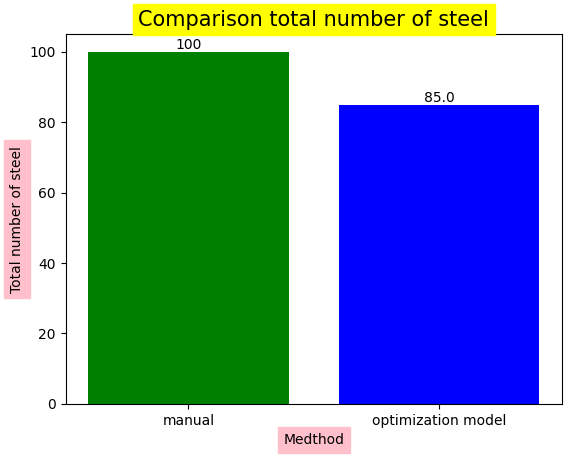

In [ ]:
import matplotlib.pyplot as plt

#data
steel_manual = 100
total_steel # 85

print(f'                   Reduct Metal: {abs(total_steel-steel_manual)} piece : { round(abs((total_steel-steel_manual)/steel_manual)*100 ,2) } %')

x = ['manual', 'optimization model']
y = [steel_manual  ,total_steel ]

plt.bar(x ,y , color = ['green', 'blue'])
for index, value in enumerate(y):
    plt.text(index, value, str(value), ha='center', va='bottom') # i, value is coordinate


plt.title('Comparison total number of steel' ,size =15 , color = 'black',backgroundcolor = 'yellow' )
plt.ylabel('Total number of steel', size =10 , color = 'black', backgroundcolor = 'pink')
plt.xlabel('Medthod', size =10 , color = 'black', backgroundcolor = 'pink')

plt.show()


                   Reduct Scrap Metal: 345.0 mm. : 0.02 %


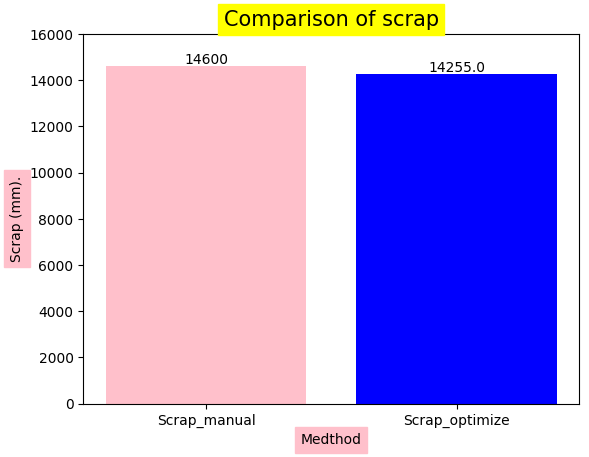

In [ ]:
#data
srap_manual =14600
total_scrap #14255

print(f'                   Reduct Scrap Metal: {abs(srap_manual-total_scrap )} mm. : { round(abs(srap_manual-total_scrap )/srap_manual,2) } %')

x = ['Scrap_manual' , 'Scrap_optimize']
y =  [srap_manual , total_scrap ]

plt.bar(x ,y , color = ['pink', 'blue'])
for index, value in enumerate(y):
    plt.text(index, value, str(value), ha='center', va='bottom') # i, value is coordinate

plt.title('Comparison of scrap' ,size =15 , color = 'black',backgroundcolor = 'yellow' )
plt.ylabel('Scrap (mm).',size =10 ,color ="black" ,backgroundcolor = 'pink')
plt.xlabel('Medthod', size =10 , color = 'black', backgroundcolor = 'pink')
plt.ylim(0, 16000)
plt.show()


In [ ]:
result_piece = [float(i.split()[2]) for i in total_piece]
result_piece   # [80.0, 40.0, 40.0, 10.0, 20.0, 24.0, 40.0, 63.0]

[80.0, 40.0, 40.0, 10.0, 20.0, 24.0, 40.0, 63.0]

In [ ]:
result_demand_work  = list(demand_work.values())
result_demand_work # [80, 40.0, 10.0, 10.0, 20.0, 20.0, 40.0, 60.0]

[80, 40.0, 10.0, 10.0, 20.0, 20.0, 40.0, 60.0]

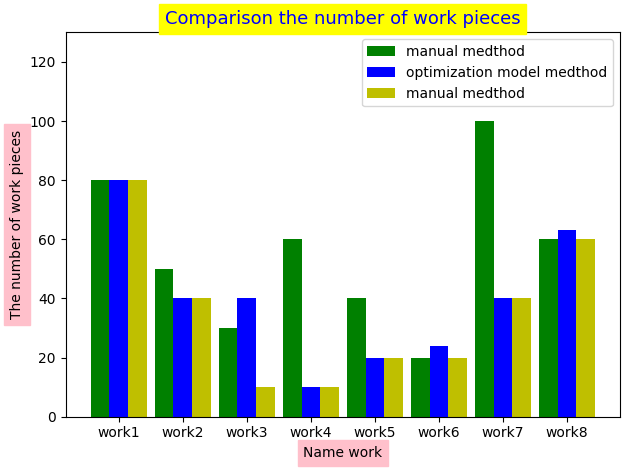

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# data to plot
manual_piece = [80	,50	,30	,60,40,	20,	100	,60]
result_piece # [80.0, 40.0, 40.0, 10.0, 20.0, 24.0, 40.0, 63.0]   model
result_demand_work # [80, 40.0, 10.0, 10.0, 20.0, 20.0, 40.0, 60.0]

#setting plot
n = 8
index = np.arange(n)
bar_width = 0.29

# plot manual medthod
plt.bar(index , manual_piece  , bar_width , color = 'g', label = 'manual medthod')

# plot model
plt.bar(index+bar_width , result_piece  , bar_width , color = 'b', label = 'optimization model medthod')

# plot result_demand_work
plt.bar(index+2* bar_width , result_demand_work   , bar_width , color = 'y', label = 'manual medthod')

plt.title('Comparison the number of work pieces' ,size =13 , color = 'blue',backgroundcolor = 'yellow' )
plt.xlabel('Name work',size =10 ,color ="black" ,backgroundcolor = 'pink')
plt.xticks(index +bar_width, ['work1', 'work2', 'work3', 'work4' ,'work5' , 'work6','work7','work8'])
plt.ylabel('The number of work pieces',size =10 ,color ="black" ,backgroundcolor = 'pink')
plt.ylim(0,130)

plt.legend()
plt.tight_layout()
plt.show()

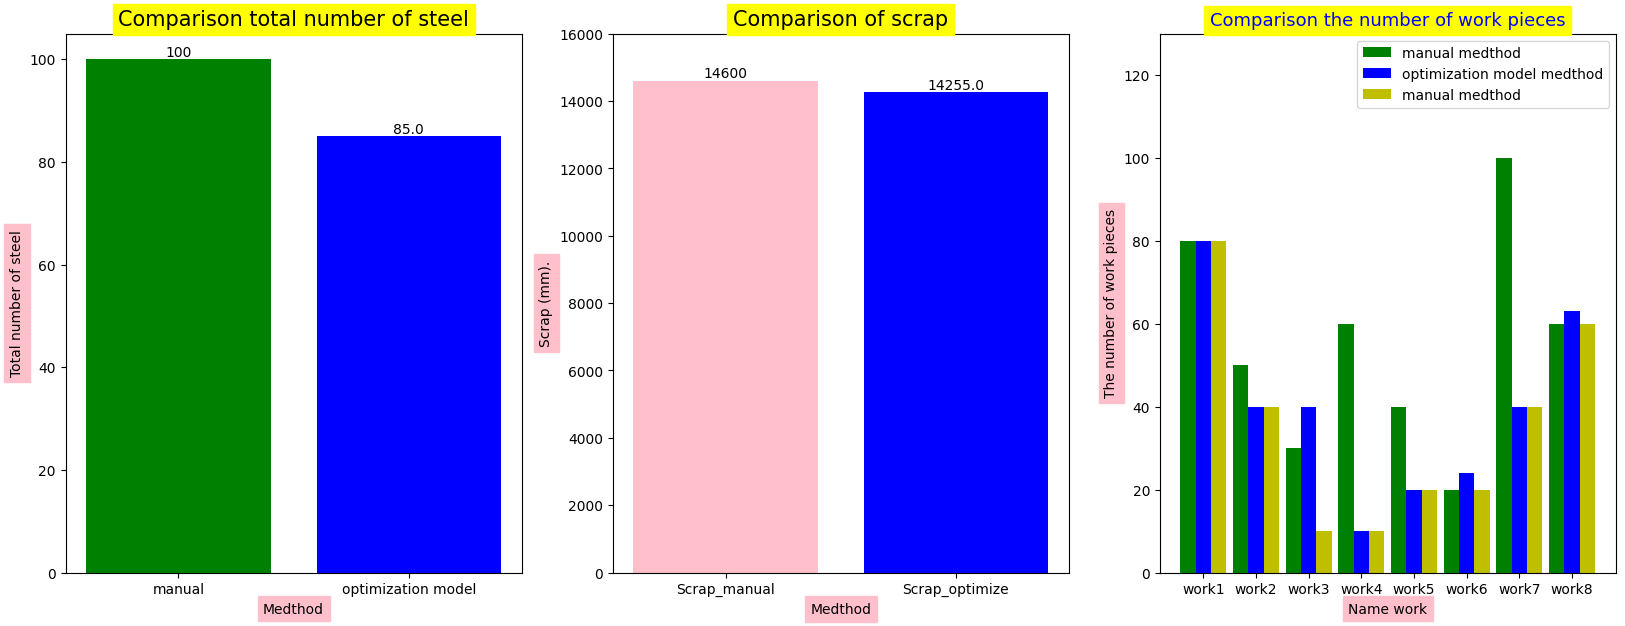

In [ ]:
import matplotlib.pyplot as plt
fig , axes = plt.subplots(1,3 , figsize = (20,7))  # (row ,column, figsize =())


#----------------------------------------------------------------------------------------------
#data Comparison total number of steel  no.1

steel_manual = 100
total_steel # 85

x = ['manual', 'optimization model']
y = [steel_manual  ,total_steel ]

axes[0].bar(x ,y , color = ['green', 'blue'])
for index, value in enumerate(y):
    axes[0].text(index, value, str(value), ha='center', va='bottom') # i, value is coordinate

axes[0].set_title('Comparison total number of steel' ,size =15 , color = 'black',backgroundcolor = 'yellow' )
axes[0].set_ylabel('Total number of steel', size =10 , color = 'black', backgroundcolor = 'pink')
axes[0].set_xlabel('Medthod', size =10 , color = 'black', backgroundcolor = 'pink')

#----------------------------------------------------------------------------------------------
#data Comparison of scrap

srap_manual =14600
total_scrap #14255

x = ['Scrap_manual' , 'Scrap_optimize']
y =  [srap_manual , total_scrap ]

axes[1].bar(x ,y , color = ['pink', 'blue'])
for index, value in enumerate(y):
    axes[1].text(index, value, str(value), ha='center', va='bottom') # i, value is coordinate

axes[1].set_title('Comparison of scrap' ,size =15 , color = 'black',backgroundcolor = 'yellow' )
axes[1].set_ylabel('Scrap (mm).',size =10 ,color ="black" ,backgroundcolor = 'pink')
axes[1].set_xlabel('Medthod', size =10 , color = 'black', backgroundcolor = 'pink')
axes[1].set_ylim(0, 16000)

#----------------------------------------------------------------------------------------------
#data Comparison the number of work pieces


manual_piece = [80	,50	,30	,60,40,	20,	100	,60]
result_piece # [80.0, 40.0, 40.0, 10.0, 20.0, 24.0, 40.0, 63.0]   model
result_demand_work # [80, 40.0, 10.0, 10.0, 20.0, 20.0, 40.0, 60.0]

#setting plot
n = 8
index = np.arange(n)
bar_width = 0.29

# plot manual medthod
axes[2].bar(index , manual_piece  , bar_width , color = 'g', label = 'manual medthod')

# plot model
axes[2].bar(index+bar_width , result_piece  , bar_width , color = 'b', label = 'optimization model medthod')

# plot result_demand_work
axes[2].bar(index+2* bar_width , result_demand_work   , bar_width , color = 'y', label = 'manual medthod')

#set axis
axes[2].set_title('Comparison the number of work pieces' ,size =13 , color = 'blue',backgroundcolor = 'yellow' )
axes[2].set_xlabel('Name work',size =10 ,color ="black" ,backgroundcolor = 'pink')
axes[2].set_ylabel('The number of work pieces',size =10 ,color ="black" ,backgroundcolor = 'pink')
axes[2].set_ylim(0,130)
axes[2].set_xticks(index +bar_width, ['work1', 'work2', 'work3', 'work4' ,'work5' , 'work6','work7','work8'])

axes[2].legend()


In [ ]:
df_merge.to_excel('Standing Cutting Optimize [out put model].xlsx')
